# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [1]:
import pandas as pd
import numpy as np
dat = pd.read_csv('Fishing.csv')
dat.head(8)

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [2]:
dat['log_income'] = dat['income'].apply(np.log)
# dat.head()

### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [3]:
dat['pdiff'] = abs(dat['price'] - dat['pbeach'])
dat.head()

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [4]:
dat.groupby('mode').agg('mean').loc[:,'price']

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [5]:
dat.groupby('mode').apply(
    lambda x: x.mean() - x.median()).loc[:,'price']

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [6]:
for name, data in dat.groupby("mode"):
    print(name) 

beach
boat
charter
pier


**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [7]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [8]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [9]:
for name, data in dat.groupby("mode"):
    data.to_csv(str(name) + '.csv')

In [10]:
# dat1 = pd.read_csv('beach.csv')
# dat1

### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [11]:
dat.sort_values('income', ascending=False, inplace=True)
# dat

### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [12]:
dat.sort_values(['price', 'income'])

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1105,1105,1106,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.000
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1013,1013,1014,beach,1.290,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
275,275,276,pier,2.290,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.0971,0.1648,1249.99980,7.130899,0.000
1155,1155,1156,pier,2.290,0.4522,2.290,2.290,70.990,105.990,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
588,588,589,charter,330.072,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,6250.00130,8.740337,223.960
446,446,447,charter,335.314,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,8750.00100,9.076809,242.734
211,211,212,charter,387.208,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,7916.66630,8.976725,271.960


In [13]:
dat.groupby('mode').agg(['mean', 'median']).loc[:,'income']

# По среднему значению есть корреляция, однако, вероятно она ложная, поскольку если взять медиану, выбивается только значение рыбалки с пирса. 

,mean,median
mode,,
beach,4051.616731,3749.9999
boat,4654.106543,3749.9999
charter,3880.899520,3749.9999
pier,3387.172123,2916.6666


### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [14]:
dat.isnull().sum().sum()

0

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [15]:
df = pd.read_csv('wgi_fh.csv', sep=';', decimal=',')
df.head()

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


In [17]:
df.isnull().sum()

# есть

country      0
cnt_code     0
year         0
va          10
ps           3
ge           5
rq           5
rl           5
cc           5
fh          17
dtype: int64

### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [18]:
df.dropna(inplace=True)
# df.isnull().sum()

### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [19]:
df.set_index('cnt_code', inplace=True)
df.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [20]:
df.sort_values(['cc', 'va'], inplace=True)
df.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [21]:
df['cc_round'] = df['cc'].apply(np.round)
df

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-2.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-2.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-2.0
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-2.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-2.0
...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.0
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.0
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.0


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [22]:
df['fh_status'] = df['fh'].apply(
    lambda x: 'free' if (1.0 <= x <= 2.5) else ('partly free' if (3.0 <= x <= 5.0) else 'not free'))
df

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-2.0,not free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-2.0,not free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-2.0,not free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-2.0,not free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-2.0,not free
...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.0,free
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.0,free
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.0,free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [23]:
df.groupby('fh_status').agg(['min', 'mean', 'max']).loc[:, 'ps']

,min,mean,max
fh_status,,,
free,-0.99,0.619059,1.49
not free,-2.91,-0.875800,1.26
partly free,-2.47,-0.424000,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [24]:
for name, data in df.groupby('fh_status'):
    data.to_csv(str(name) + '.csv')

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

<BarContainer object of 3 artists>

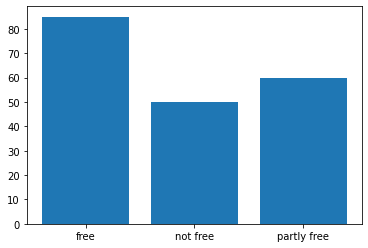

In [25]:
import matplotlib.pyplot as plt

for_plot = df.groupby('fh_status').agg('count').loc[:, 'country']

groups = list(for_plot.index.values.astype(str))
counts = list(for_plot)

plt.bar(groups, counts)